<a href="https://colab.research.google.com/github/122333D/project/blob/master/Predicttt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade pip


Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive/ctuCsv"

 All_162182.csv      ctu-10.csv		   groupby11.csv        test162182.csv
 All_train_162.csv   ctu-11.csv		   groupby162182.csv    yhat16219.csv
 All_train199.csv    ctu-42.csv		   groupby162.csv       yhat19.csv
 All_train_19.csv   'data test'		   groupby199.csv
 All_train19.csv    'data train'	   groupby19.csv
 All_train.csv	     finalPredictyesssss   rfcBotreduceft.pkl


In [0]:
import pandas as pd 
df = pd.read_csv('/content/gdrive/My Drive/ctuCsv/groupby19.csv')
df.head()
# df.isnull().sum()


,Flow id,No.,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,Protocols in frame,Time to live,udp_Length,IP_Flags,Sequence number,Next sequence number,TCP Segment Len,tcp_Flags,isBot,Flow name,NumForward,Forward,IOPR,Total,FPL,NumPackets,BytesTotal,StdDevLen,SameLenPktRatio,Duration,AvgPktPerSec,BitsPerSec,APL,IAT,isNull,NPEx,reconnects
0,2578261,5437860,1937.800,147.32.86.58,2.136.152.92,UDP,357,48784,29387,eth:ethertype:ip:udp:wol,127,323.0,0x0000,NaN,NaN,NaN,0,0,2.136.152.92-147.32.86.58-29387-48784-UDP,0,0,-1.0,1,357,1,357,0.00,1.0,0.000000,0.00,0.0,357.000,0.000000,0,0,0
1,922661,1916650,672.836,83.208.169.216,147.32.85.26,TCP,70,26471,62860,eth:ethertype:ip:tcp,118,NaN,0x4000,16909705.0,16909721.0,16.0,24,0,83.208.169.216-147.32.85.26-26471-62860-TCP,1,1,1.0,2,70,2,130,5.00,1.0,0.000238,8403.36,4369750.0,65.000,0.000119,1,2,0
2,4865614,10407401,3462.620,147.32.85.103,74.125.108.137,TCP,66,60847,80,eth:ethertype:ip:tcp,62,NaN,0x4000,1777.0,1777.0,0.0,16,0,74.125.108.137-147.32.85.103-80-60847-TCP,0,0,-1.0,2,66,2,132,0.00,0.5,0.000167,11976.00,6323350.0,66.000,0.000083,2,4,2
3,3159587,6844893,2225.180,147.32.84.59,157.22.19.142,TCP,60,1575,80,eth:ethertype:ip:tcp,126,NaN,0x4000,869.0,869.0,0.0,16,0,157.22.19.142-147.32.84.59-80-1575-TCP,0,0,-1.0,1,60,1,60,0.00,1.0,0.000000,0.00,0.0,60.000,0.000000,1,1,0
4,4565672,9802276,3213.990,83.208.169.216,147.32.85.26,TCP,1506,26471,62860,eth:ethertype:ip:tcp,118,NaN,0x4000,65656149.0,65657601.0,1452.0,16,0,83.208.169.216-147.32.85.26-26471-62860-TCP,2,1,0.5,3,1506,3,1628,681.18,1.0,0.000605,4958.68,21527300.0,542.667,0.000202,1,3,0


In [0]:
df = df.sort_values(by=['Flow id']).reset_index(drop=True)

In [0]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(['NBNS', 'SMB', 'PKIX-CRL', 'TCP', 'SIP', 'BROWSER', 'SMTP|IMF', 'SMTP', 'DNS', 'HTTP/XML', 'SSDP', 'SNMP', 'PKTC', 'Laplink', 'IRC', 'UDP', 'SSL', 'ICMP', 'NBSS', 'Socks', 'DCERPC', 'LANMAN', 'HTTP', 'SSLv2', 'TLSv1'])
df['Protocol_2']=num.fit_transform(df['Protocol']).astype('int')

In [0]:
df['IP_Flags'] = df['IP_Flags'].apply(lambda x:int(x,16) if x!='' else 0)

In [0]:
df = df.fillna(-1)

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X = np.asarray(df[['Time','Length','Source Port','Destination Port','Time to live','udp_Length','FPL','APL']])
y = np.asarray(df['isBot'])
rfc = RandomForestClassifier(n_estimators=40)

rfe = RFE(rfc,1)
rfe_fit = rfe.fit(X, y)
print("Num Features: %s" % (rfe_fit.n_features_))
print("Selected Features: %s" % (rfe_fit.support_))
print("Feature Ranking: %s" % (rfe_fit.ranking_))

Num Features: 1
Selected Features: [False False False  True False False False False]
Feature Ranking: [8 4 2 1 6 3 5 7]


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
fine = ['Destination Port','Source Port','udp_Length','Length','FPL','Time to live','APL','Time','BytesTotal','Sequence number','Protocol_2','Next sequence number','TCP Segment Len','IOPR','StdDevLen',
     'IP_Flags','tcp_Flags','SameLenPktRatio','NumForward','Forward','BitsPerSec','IAT','Total','Duration','NumPackets','AvgPktPerSec','isNull','NPEx','reconnects']

for i in range(len(fine)):
  i=i+1
  b= fine[0:i]
  X = np.asarray(df[b])
  y = np.asarray(df['isBot'])
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
  rfc = RandomForestClassifier(n_estimators=40)
  rfc.fit(X_train,y_train)
  print ('F1 score =', f1_score(y_test,rfc.predict(X_test)))
  


F1 score = 0.8901759333870534
F1 score = 0.9863316392562896
F1 score = 0.9860501814738835
F1 score = 0.9874568088228334
F1 score = 0.9869834808538837
F1 score = 0.9940227419685523
F1 score = 0.9939902519046643
F1 score = 0.9987830896878703
F1 score = 0.9988305572236796
F1 score = 0.9990361978796354
F1 score = 0.9989886859237722
F1 score = 0.9987516000063211
F1 score = 0.9986093552465234
F1 score = 0.998704008092047
F1 score = 0.9984981899236448
F1 score = 0.9986250928457417
F1 score = 0.9985143037774618
F1 score = 0.9984985696900731
F1 score = 0.9984511316222026
F1 score = 0.9980713292019728
F1 score = 0.9979923805308336
F1 score = 0.9980714511539678
F1 score = 0.9981822492689482
F1 score = 0.9981661818641709
F1 score = 0.9984194221407348
F1 score = 0.9980238091473922
F1 score = 0.998055428201034
F1 score = 0.9979291484215685
F1 score = 0.9979925709317948


In [0]:
fine = ['Destination Port','Source Port','udp_Length','Length','FPL','Time to live','APL','Time','BytesTotal','Sequence number','Protocol_2','Next sequence number','TCP Segment Len','IOPR','StdDevLen',
     'IP_Flags','tcp_Flags','SameLenPktRatio','NumForward','Forward','BitsPerSec','IAT','Total','Duration','NumPackets','AvgPktPerSec','isNull','NPEx','reconnects']

for i in range(len(fine)):
  i=i+1
  print(i)
  b= fine[0:i]
  print(b)

1
['Destination Port']
2
['Destination Port', 'Source Port']
3
['Destination Port', 'Source Port', 'udp_Length']
4
['Destination Port', 'Source Port', 'udp_Length', 'Length']
5
['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL']
6
['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live']
7
['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL']
8
['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time']
9
['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time', 'BytesTotal']
10
['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time', 'BytesTotal', 'Sequence number']
11
['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time', 'BytesTotal', 'Sequence number', 'Protocol_2']
12
['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live

In [0]:
import numpy as np
X = np.asarray(df[['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time', 'BytesTotal', 'Sequence number']])
y = np.asarray(df['isBot'])

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(X_train,y_train)
yhat = rfc.predict(X_test)
print ('F1 score =', f1_score(y_test,yhat))

F1 score = 0.9988622716642437


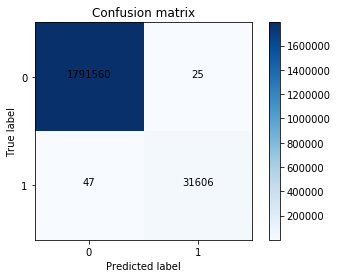

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_matrix(y_test,yhat), classes=['0','1'],normalize= False,  title='Confusion matrix')

In [0]:
from sklearn.metrics import classification_report
yhat = rfc.predict(X_test) 
print(classification_report(y_test,yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1791585
           1       1.00      1.00      1.00     31653

    accuracy                           1.00   1823238
   macro avg       1.00      1.00      1.00   1823238
weighted avg       1.00      1.00      1.00   1823238



In [0]:
from sklearn.externals import joblib 
joblib.dump(rfc,'/content/gdrive/My Drive/ctuCsv/rfcBotreduceft.pkl') 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/content/gdrive/My Drive/ctuCsv/rfcBotreduceft.pkl']

In [0]:
import pandas as pd 
dtest = pd.read_csv('/content/gdrive/My Drive/ctuCsv/groupby162.csv')
dtest.head()

,Flow id,No.,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,Protocols in frame,Time to live,udp_Length,IP_Flags,Sequence number,Next sequence number,TCP Segment Len,tcp_Flags,isBot,Flow name,NumForward,Forward,IOPR,Total,FPL,NumPackets,BytesTotal,StdDevLen,SameLenPktRatio,Duration,AvgPktPerSec,BitsPerSec,APL,IAT,isNull,NPEx,reconnects
0,2578261,4942135,823.019,46.4.84.230,147.32.84.59,UDP,1083,54012,7525,eth:ethertype:ip:udp:wol,54,1049.0,0x4000,NaN,NaN,NaN,0,0,46.4.84.230-147.32.84.59-54012-7525-UDP,1,1,0.0,1,1083,1,1083,0.0,1.0,0.0,0.0,0.0,1083.0,0.0,0,0,0
1,922661,2065098,272.037,147.32.84.94,176.9.0.180,UDP,60,7103,52012,eth:ethertype:ip:udp:lbtrm,63,16.0,0x4000,NaN,NaN,NaN,0,0,176.9.0.180-147.32.84.94-52012-7103-UDP,0,0,-1.0,1,60,1,60,0.0,1.0,0.0,0.0,0.0,60.0,0.0,0,0,0
2,3159587,6014109,1007.610,147.32.84.59,188.40.116.162,UDP,1082,7525,50012,eth:ethertype:ip:udp:wol,62,1048.0,0x4000,NaN,NaN,NaN,0,0,188.40.116.162-147.32.84.59-50012-7525-UDP,0,0,-1.0,1,1082,1,1082,0.0,1.0,0.0,0.0,0.0,1082.0,0.0,0,0,0
3,455697,1004056,100.024,125.228.221.40,147.32.84.94,UDP,78,7191,7103,eth:ethertype:ip:udp:rtps,106,44.0,0x0000,NaN,NaN,NaN,0,0,147.32.84.94-125.228.221.40-7103-7191-UDP,0,0,-1.0,1,78,1,78,0.0,1.0,0.0,0.0,0.0,78.0,0.0,0,0,0
4,1032731,2250943,308.973,147.32.84.59,188.40.113.241,UDP,1083,7525,50012,eth:ethertype:ip:udp:wol,62,1049.0,0x4000,NaN,NaN,NaN,0,0,188.40.113.241-147.32.84.59-50012-7525-UDP,0,0,-1.0,1,1083,1,1083,0.0,1.0,0.0,0.0,0.0,1083.0,0.0,0,0,0


In [0]:
dtest = dtest.sort_values(by=['Flow id']).reset_index(drop=True)

In [0]:
# aa=dtest[dtest['isBot']==1].groupby('Predict_label')
# aa.head()


In [0]:
# a=dtest[dtest['isBot']==0].groupby('Predict_label')
# a.head()

In [0]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(['NBNS', 'SMB', 'PKIX-CRL', 'TCP', 'SIP', 'BROWSER', 'SMTP|IMF', 'SMTP', 'DNS', 'HTTP/XML', 'SSDP', 'SNMP', 'PKTC', 'Laplink', 'IRC', 'UDP', 'SSL', 'ICMP', 'NBSS', 'Socks', 'DCERPC', 'LANMAN', 'HTTP', 'SSLv2', 'TLSv1'])
dtest['Protocol_2']=num.fit_transform(dtest['Protocol']).astype('int')

In [0]:
dtest['IP_Flags'] = dtest['IP_Flags'].apply(lambda x:int(x,16) if x!='' else 0)

In [0]:
dtest = dtest.fillna(-1)

In [0]:
df['dataff']=1
dtest['dataff']=2

In [0]:
frames = [df,dtest]

result = pd.concat(frames)

In [0]:
result[result['APL']=='APL'].head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.asarray(dtest[['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time', 'BytesTotal', 'Sequence number']])
y = np.asarray(dtest['isBot'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib 
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
X = np.asarray(result[['Destination Port', 'Source Port', 'udp_Length', 'Length', 'FPL', 'Time to live', 'APL', 'Time', 'BytesTotal', 'Sequence number']])
y = np.asarray(result['isBot'])
rfc = RandomForestClassifier(n_estimators=40) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
rfc.fit(X_train,y_train)
yhat = rfc.predict(X_test)
print ('F1 score =', f1_score(y_test,yhat))

# # Use the loaded model to make predictions 
# yhat2 = rfc_from_joblib.predict(X) 
# result["Predict_label"]  = yhat2
# print(classification_report(result['isBot'],result["Predict_label"],labels=[0,1]))



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


F1 score = 0.9983445891504665


In [0]:
d = ['Destination Port','Source Port','udp_Length','Length','FPL','Time to live','APL','Time','BytesTotal','Sequence number','Protocol_2','Next sequence number','TCP Segment Len','IOPR','StdDevLen',
     'IP_Flags','tcp_Flags','SameLenPktRatio','NumForward','Forward','BitsPerSec','IAT','Total','Duration','NumPackets','AvgPktPerSec','isNull','NPEx','reconnects']
dii = []
a=range(0,28)
dii = dict(zip(a,d))
print(dii[0])

Destination Port


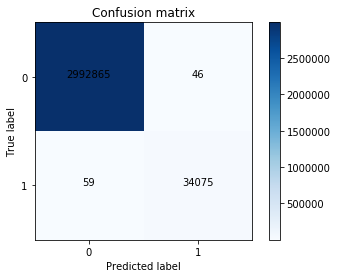

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_matrix(y_test,yhat), classes=['0','1'],normalize= False,  title='Confusion matrix')

In [0]:
result.to_csv(r'/content/gdrive/My Drive/ctuCsv/finalPredictyesssss',index = None , header = True)

In [0]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(C=1, solver='lbfgs')
# clf = SVC(kernel='rbf', gamma='auto')
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
rfc = RandomForestClassifier(n_estimators=40)

def scorer(i,j,k,):
    for every in (i,j,k,):
        every.fit(X_train,y_train)
        print (every.__class__.__name__, 'F1 score =', f1_score(y_test,every.predict(X_test)))
scorer (lr,dtree,rfc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression F1 score = 0.06353246493986126
DecisionTreeClassifier F1 score = 0.7226003798383167
RandomForestClassifier F1 score = 0.9988780911748439


In [0]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X_train,y_train)
print ('F1 score =', f1_score(y_test,predict(X_test)))

In [0]:
print(len(df))
print(len(dtest))
print(len(result))

6077459
4012691
10090150


In [0]:
print(yhat=1)

TypeError: ignored

In [0]:
d = result[result.isBot == 1].groupby(['Source','Destination'])
d.head()

,Flow id,No.,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,Protocols in frame,Time to live,udp_Length,IP_Flags,Sequence number,Next sequence number,TCP Segment Len,tcp_Flags,isBot,Flow name,NumForward,Forward,IOPR,Total,FPL,NumPackets,BytesTotal,StdDevLen,SameLenPktRatio,Duration,AvgPktPerSec,BitsPerSec,APL,IAT,isNull,NPEx,reconnects,Protocol_2,dataff
291,291,710,0.35725,219.85.198.200,147.32.84.165,UDP,89,7600,7600,eth:ethertype:ip:udp:rtps,43,55.0,0,-1.0,-1.0,-1.0,0,1,219.85.198.200-147.32.84.165-7600-7600-UDP,1,1,0.0,1,89,1,89,0.0,1.0,0.0,0.0,0.0,89.0,0.0,0,0,0,57,1
13435,13435,29980,14.35580,119.224.98.51,147.32.84.165,UDP,89,63576,7600,eth:ethertype:ip:udp:rtps,50,55.0,0,-1.0,-1.0,-1.0,0,1,147.32.84.165-119.224.98.51-7600-63576-UDP,0,0,-1.0,1,89,1,89,0.0,1.0,0.0,0.0,0.0,89.0,0.0,0,0,0,57,1
17759,17759,39411,18.80270,119.224.98.51,147.32.84.165,UDP,89,63576,7600,eth:ethertype:ip:udp:rtps,50,55.0,0,-1.0,-1.0,-1.0,0,1,147.32.84.165-119.224.98.51-7600-63576-UDP,0,0,-1.0,1,89,1,89,0.0,1.0,0.0,0.0,0.0,89.0,0.0,0,0,0,57,1
29893,29893,64309,30.75450,175.180.240.104,147.32.84.165,UDP,89,7600,7600,eth:ethertype:ip:udp:rtps,108,55.0,0,-1.0,-1.0,-1.0,0,1,175.180.240.104-147.32.84.165-7600-7600-UDP,1,1,0.0,1,89,1,89,0.0,1.0,0.0,0.0,0.0,89.0,0.0,0,0,0,57,1
36413,36413,79142,37.18040,219.142.90.227,147.32.84.165,UDP,89,22155,7600,eth:ethertype:ip:udp:rtps,109,55.0,0,-1.0,-1.0,-1.0,0,1,219.142.90.227-147.32.84.165-22155-7600-UDP,1,1,0.0,1,89,1,89,0.0,1.0,0.0,0.0,0.0,89.0,0.0,0,0,0,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352538,1352538,2829734,413.56200,147.32.84.165,195.113.232.73,TCP,60,1074,80,eth:ethertype:ip:tcp,127,-1.0,16384,116.0,116.0,0.0,16,1,195.113.232.73-147.32.84.165-80-1074-TCP,0,0,-1.0,1,60,1,60,0.0,1.0,0.0,0.0,0.0,60.0,0.0,1,1,0,46,2
1776276,1776276,3755761,554.08000,147.32.84.165,209.85.149.160,TCP,60,1051,80,eth:ethertype:ip:tcp,127,-1.0,16384,137.0,137.0,0.0,16,1,209.85.149.160-147.32.84.165-80-1051-TCP,0,0,-1.0,1,60,1,60,0.0,1.0,0.0,0.0,0.0,60.0,0.0,1,1,0,46,2
2130760,2130760,4277714,670.34700,85.67.57.3,147.32.84.193,UDP,109,30509,17676,eth:ethertype:ip:udp:rtps,118,75.0,0,-1.0,-1.0,-1.0,0,1,85.67.57.3-147.32.84.193-30509-17676-UDP,1,1,0.0,1,109,1,109,0.0,1.0,0.0,0.0,0.0,109.0,0.0,0,0,0,49,2
2795883,2795883,5383639,913.43400,195.113.232.73,147.32.84.165,TCP,60,80,1074,eth:ethertype:ip:tcp,57,-1.0,16384,4570.0,4570.0,0.0,17,1,195.113.232.73-147.32.84.165-80-1074-TCP,1,1,0.0,1,60,1,60,0.0,1.0,0.0,0.0,0.0,60.0,0.0,1,1,0,46,2


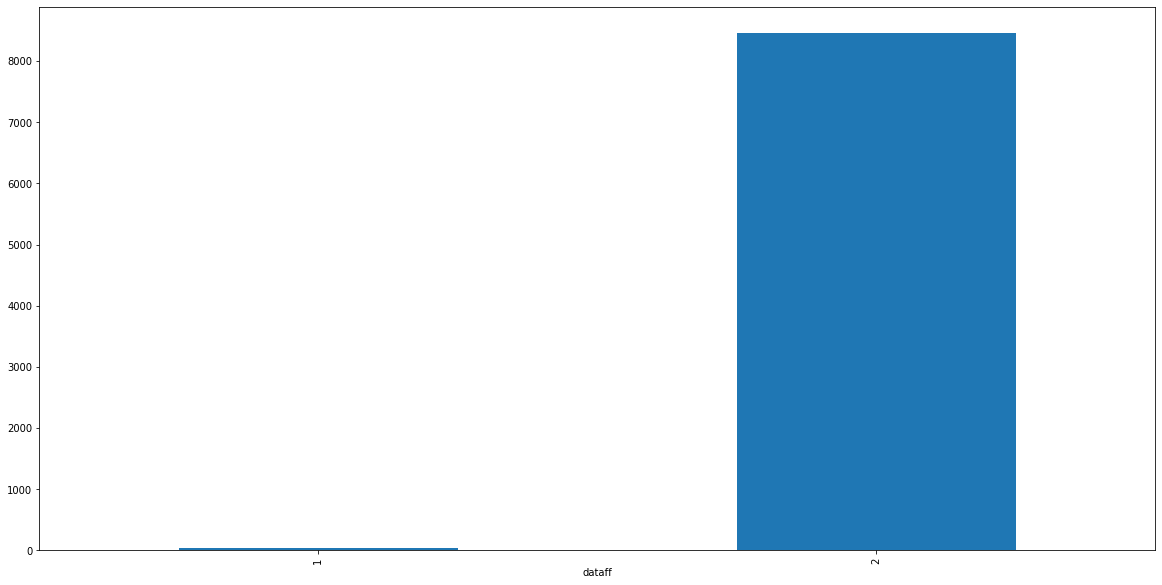

In [0]:

dd = result[(result.isBot == 1) & (result.Predict_label == 0)].groupby('dataff')['APL'].count()
dd.plot(kind ='bar',figsize=(20,10))
plt.show()

In [0]:
dtest[dtest['Flow name'] == '147.32.84.165-119.167.201.242-1053-80-TCP'].head()

,Flow id,No.,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,Protocols in frame,Time to live,udp_Length,IP_Flags,Sequence number,Next sequence number,TCP Segment Len,tcp_Flags,isBot,Flow name,NumForward,Forward,IOPR,Total,FPL,NumPackets,BytesTotal,StdDevLen,SameLenPktRatio,Duration,AvgPktPerSec,BitsPerSec,APL,IAT,isNull,NPEx,reconnects,Protocol_2,Predict_label


In [0]:
hh[hh['Predict_label']==0].head()

,APL,AvgPktPerSec,BitsPerSec,BytesTotal,Destination,Destination Port,Duration,FPL,Flow id,Flow name,Forward,IAT,IOPR,IP_Flags,Length,NPEx,Next sequence number,No.,NumForward,NumPackets,Predict_label,Protocol,Protocol_2,Protocols in frame,SameLenPktRatio,Sequence number,Source,Source Port,StdDevLen,TCP Segment Len,Time,Time to live,Total,isBot,isNull,reconnects,tcp_Flags,udp_Length


In [0]:
result[result['Predict_label']==0].head()

,APL,AvgPktPerSec,BitsPerSec,BytesTotal,Destination,Destination Port,Duration,FPL,Flow id,Flow name,Forward,IAT,IOPR,IP_Flags,Length,NPEx,Next sequence number,No.,NumForward,NumPackets,Predict_label,Protocol,Protocol_2,Protocols in frame,SameLenPktRatio,Sequence number,Source,Source Port,StdDevLen,TCP Segment Len,Time,Time to live,Total,isBot,isNull,reconnects,tcp_Flags,udp_Length
0,413.333,8823.53,29176500.0,1240,147.32.85.26,62860,0.00034,60,0,90.180.253.169-147.32.85.26-16207-62860-TCP,1,0.000113,2.0,0,60,3,1.0,1,1,3,0,TCP,52,eth:ethertype:ip:tcp,0.666667,1.0,90.180.253.169,16207,249.844,0.0,0.000000,118,3,0,1,0,16,-1.0
1,62.000,0.00,0.0,62,147.32.84.229,13363,0.00000,62,1,98.27.131.242-147.32.84.229-11256-13363-UDP,1,0.000000,0.0,0,62,0,-1.0,4,1,1,0,UDP,57,eth:ethertype:ip:udp:rtps,1.000000,-1.0,98.27.131.242,11256,0.000,-1.0,0.000487,107,1,0,0,0,0,28.0
2,413.333,8108.11,26810800.0,1240,147.32.85.26,62860,0.00037,60,2,90.180.253.169-147.32.85.26-16207-62860-TCP,1,0.000123,2.0,0,60,3,1.0,5,1,3,0,TCP,52,eth:ethertype:ip:tcp,0.666667,1.0,90.180.253.169,16207,249.844,0.0,0.001566,118,3,0,1,0,16,-1.0
3,60.000,0.00,0.0,60,147.32.84.229,13363,0.00000,60,3,219.84.184.25-147.32.84.229-48225-13363-UDP,1,0.000000,0.0,0,60,0,-1.0,8,1,1,0,UDP,57,eth:ethertype:ip:udp:rtps,1.000000,-1.0,219.84.184.25,48225,0.000,-1.0,0.002145,105,1,0,0,0,0,26.0
4,70.000,0.00,0.0,70,147.122.45.75,60730,0.00000,70,4,147.32.84.229-147.122.45.75-443-60730-TCP,1,0.000000,0.0,16384,70,0,5.0,9,1,1,0,TCP,52,eth:ethertype:ip:tcp,1.000000,1.0,147.32.84.229,443,0.000,4.0,0.002598,127,1,0,0,0,24,-1.0


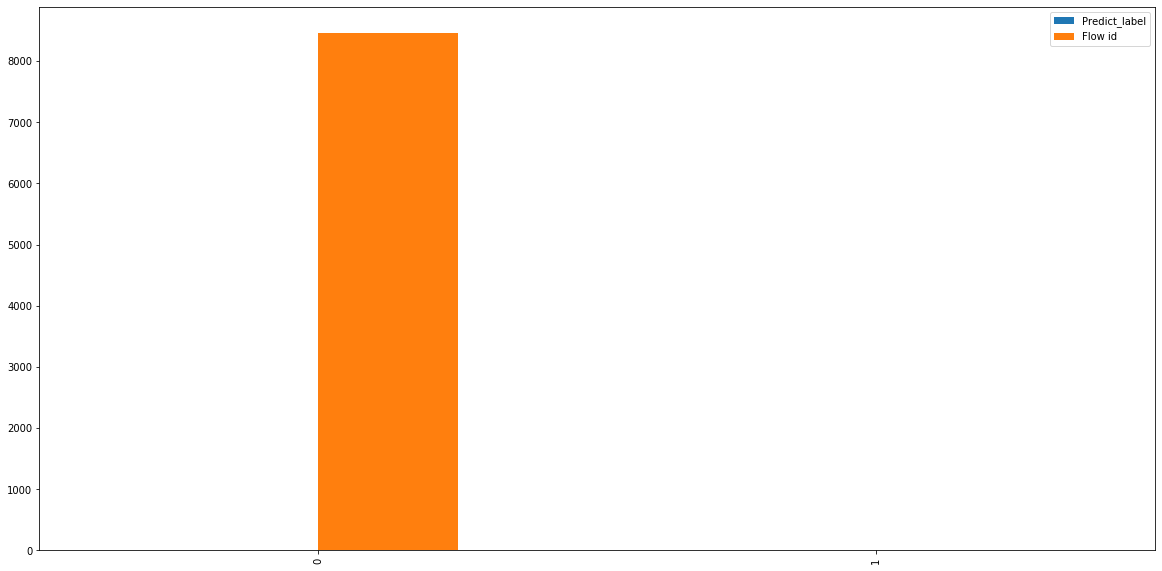

In [0]:
import matplotlib.pyplot as plt
dataperDay = result[result['isBot']==1].groupby('Predict_label')['Flow id'].count().reset_index()
dataperDay.plot(kind ='bar',figsize=(20,10))
plt.show()

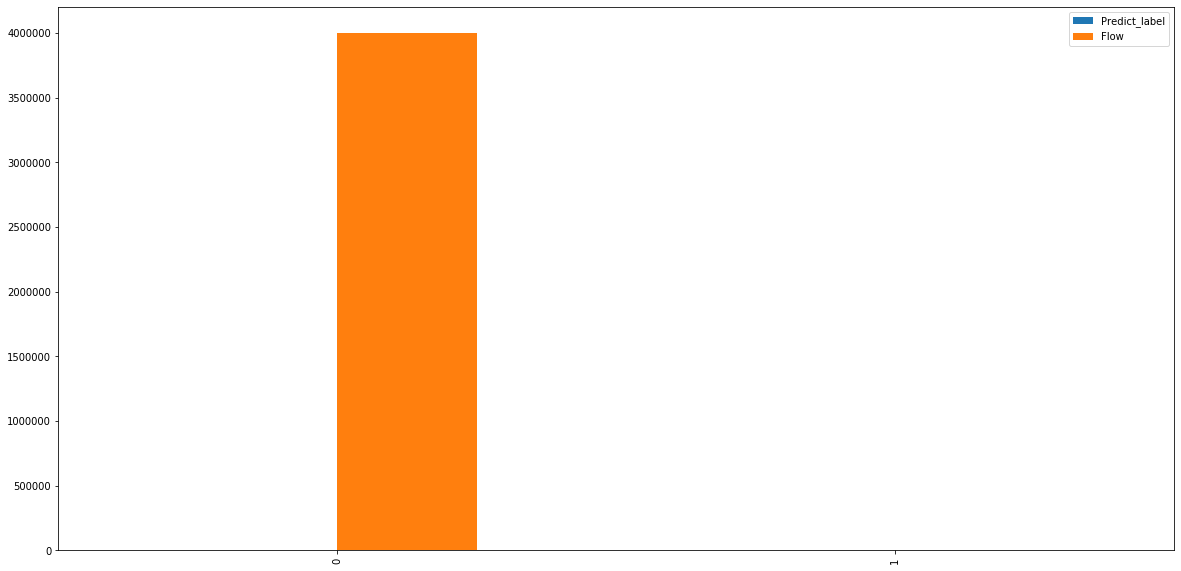

In [0]:
dataperdayofWeek2 = dtest[dtest['isBot']==0].groupby('Predict_label')['Flow'].count().reset_index()
dataperdayofWeek2.plot(kind ='bar',figsize=(20,10))
plt.show()